<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

***Импорты***

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Данные не содержат пропусков, состоят из соответствующих столбцов с числовыми значениями.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** b. Не изменится.

**Обоснование:**

Обратимая матрица: квадратная матрица А порядка n называется обратимой, если существует квадратная матрица A^-1 порядка n такая, что: 

$
AA^{-1} = A^{-1}A = E
$

Е - единичная матрица, состоящая из нулей и единиц по диалогонали слева-направо


Формула весов машинного обучения методом линейной регрессии...

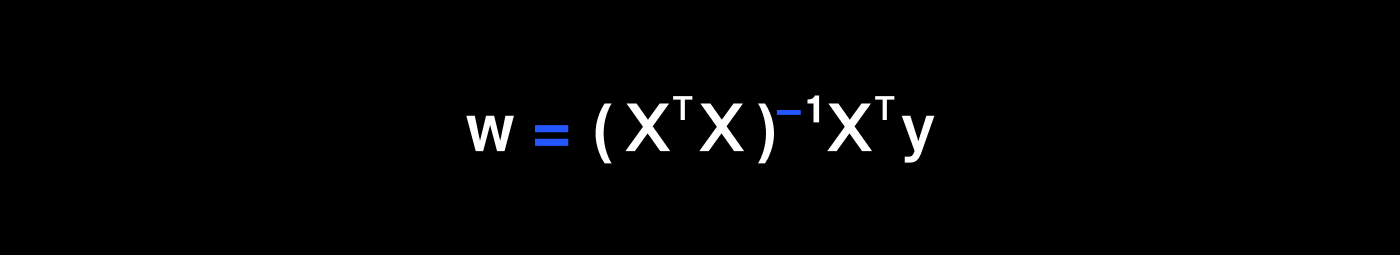

Мы утверждаем, что:

$
a = Xw = X’w’ = a’
$

w - весы, X - признаки

Если V - обратимая матрица, на которую домножают признаки, тогда w1 это весы для модели с признаками, домноженными на обратимую матрицу V

Если:

$
w = (X^{T}X)^{-1}X^{T}y
$

Тогда:

$
w1 = ((X*V)^{T}*(X*V))^{-1}*(X*V)^{T}*y
$

У матриц есть такие свойства<br>
- ($A(BC) = (AB)C$); это свойство ассоциативности (сочетательности) матриц<br>
- $(P^T)^{-1} = (P^{-1})^T$; то есть: транспортированная оратная матрица есть обратная матрица транспортированная <br>
- $(AB)^T = B^T A^T$; то есть: транспонированное произведение матриц равно произведению транспонированных матриц <br>
- $(AB)^{-1} = B^{-1} A^{-1}$,то есть: обратная матрица от произведения двух матриц равна обратной матрицы B(второй) к обратной матрице А(первой)<br>
- $P P^{-1} = E$ ; умножение матрицы на свою обратную - есть единичная матрица.<br>


И принимая во внимание, что
$
AA^{-1} = A^{-1}A = E
$

Получаем:

$
w1 = (X^{T}*V^{T}*X*V)^{-1}*X^{T}*V^{T}*y
$

$ X^{-T}*X^{T} = E $  и  $ V^{-T}*V^{T} = E $

Тогда:

При $
AA^{-1} = A^{-1}A = E
$, =>  $A^{-1}*E = A$

$
w1 = (X^{T}*V^{T}*X*V)^{-1}*X^{T}*V^{T}*y = V^{-T}*(X^{T}*X*V)^{-1}*X^{T}*V^{T}*y
$

$
w1 = E*(X^{T}*X*V)^{-1}*X^{T}*y = E*V^{-1}*(X^{T}*X)^{-1}*X^{T}*y
$

$
w = (X^{T}*X)^{-1}*X^{T}*y
$

$
w1 = E*V^{-1}*w*y$, где 
$
w = (X^{T}*X)^{-1}*X^{T}
$


**Создадим модель линейной регрессии для нахождения количества страховых выплат**

In [5]:
features = df.drop(['Страховые выплаты'], axis = 1)
target = df['Страховые выплаты']

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)

In [7]:
print('Размеры тренировочной выборки:')
print(features_train.shape)
print(target_train.shape)

print('Размеры валидационной выборки:')
print(features_valid.shape)
print(target_valid.shape)

Размеры тренировочной выборки:
(3750, 4)
(3750,)
Размеры валидационной выборки:
(1250, 4)
(1250,)


In [8]:
print('Скаляризация - уравновешивание признаков...')

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)

Скаляризация - уравновешивание признаков...


**Обучим модель и определим RMSE и R2**

In [9]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid)

In [10]:
print('RMSE модели на обучающей выборке:', mean_squared_error(target_train, predictions_train)**0.5)
print('Коэффициент детерминации на обучающей выборке:', r2_score(target_train, predictions_train))

RMSE модели на обучающей выборке: 0.35447723232889156
Коэффициент детерминации на обучающей выборке: 0.4213920242579372


In [11]:
print('RMSE модели на валидационной выборке:', mean_squared_error(target_valid, predictions_valid)**0.5)
print('Коэффициент детерминации на валидационной выборке:', r2_score(target_valid, predictions_valid))

RMSE модели на валидационной выборке: 0.3414749986825619
Коэффициент детерминации на валидационной выборке: 0.43522757127026657


**Создание рандомной матрицы соответствующего размера**

In [12]:
matrix = np.random.normal(size = (4, 4))

np.linalg.inv(matrix)

array([[ 0.34950095, -0.23043985, -0.04723958, -0.15422967],
       [-0.26819863,  0.07950807,  0.49996441,  0.33431357],
       [ 0.21876245, -0.42889048, -0.99914092,  0.55858455],
       [-0.0022644 , -0.71491627, -0.69381073, -0.02703181]])

In [13]:
matrix.shape

(4, 4)

In [14]:
np.array(features).shape

(5000, 4)

**Умножение features на рандомную матрицу**

In [15]:
features_new = np.array(features).dot(matrix.T)

**Определение новых RMSE и R2**

In [16]:
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features_new, target, test_size = 0.25, random_state = 12345)

In [17]:
print('Скаляризация - уравновешивание признаков...')

scaler = StandardScaler()

features1_train = scaler.fit_transform(features1_train)
features1_valid = scaler.transform(features1_valid)

Скаляризация - уравновешивание признаков...


In [18]:
model = LinearRegression()
model.fit(features1_train, target1_train)
predictions1_train = model.predict(features1_train)
predictions1_valid = model.predict(features1_valid)

In [19]:
print('Матрица признаков до преобразования и уменьшения на обратную матрицу')
features_train

Матрица признаков до преобразования и уменьшения на обратную матрицу


array([[ 0.97941189,  1.41413254, -0.37826615, -0.16408134],
       [ 0.97941189,  0.34955873,  1.78951395, -1.0783533 ],
       [-1.02102089,  0.11298677,  0.11809472, -0.16408134],
       ...,
       [ 0.97941189,  1.17756058,  0.482768  , -0.16408134],
       [-1.02102089, -1.06987302,  1.02977793,  2.57873455],
       [-1.02102089, -1.42473096,  0.08770528, -1.0783533 ]])

In [20]:
print('Матрица признаков после преобразования и уменьшения на обратную матрицу')
features1_train

Матрица признаков после преобразования и уменьшения на обратную матрицу


array([[-0.37821577, -0.38260942,  0.38207427, -0.37673691],
       [ 1.7898435 ,  1.78865902, -1.78841157,  1.78998341],
       [ 0.11792436,  0.11799008, -0.11795067,  0.11820943],
       ...,
       [ 0.48283533,  0.47909798, -0.47955158,  0.48405185],
       [ 1.02919271,  1.03205758, -1.0326854 ,  1.028468  ],
       [ 0.08789823,  0.09261699, -0.09155272,  0.08623983]])

In [21]:
print('RMSE модели на обучающей выборке:', mean_squared_error(target1_train, predictions1_train)**0.5)
print('Коэффициент детерминации на обучающей выборке:', r2_score(target1_train, predictions1_train))

RMSE модели на обучающей выборке: 0.35447723232889117
Коэффициент детерминации на обучающей выборке: 0.42139202425793854


In [22]:
print('RMSE модели на валидационной выборке:', mean_squared_error(target1_valid, predictions1_valid)**0.5)
print('Коэффициент детерминации на валидационной выборке:', r2_score(target1_valid, predictions1_valid))

RMSE модели на валидационной выборке: 0.34147499868256026
Коэффициент детерминации на валидационной выборке: 0.4352275712702721


## Алгоритм преобразования

**Алгоритм**

Умножение признаков на обратимую матрицу.

**Обоснование**

Исходя из пункта №2, что описан и обоснован выше, при умножении признаков на обратимую матрицу значения RMSE и R2, которые являются метриками качества линейной регрессии не меняются, но сами значения признаков изменяются.

Это делает данный алгоритм удобным и подходящим для защиты персональных данных клиентов страховой компании, ведь зная матрицу-ключ можно получить исходные данные, а по зашифорванным данным, используя модель линейной регрессии, получить целевой признак.

👍 👍

## Проверка алгоритма

***См. пункт №2...***

P.S. Прошу прощения, что скучковал реализацию модели защиты данных пользователей в одном месте. Я подумал, что помимо вывода формулы это также может являться наглядным примером ответа на вопрос "изменяется ли качество линейной регрессии при умножении на данных на обратимую матрицу или нет".

In [23]:
display(pd.DataFrame(np.array([[mean_squared_error(target_train, predictions_train)**0.5,  mean_squared_error(target1_train, predictions1_train)**0.5],
                           [mean_squared_error(target_valid, predictions_valid)**0.5, mean_squared_error(target1_valid, predictions1_valid)**0.5],
                           [r2_score(target_train, predictions_train), r2_score(target1_train, predictions1_train)],
                           [r2_score(target_valid, predictions_valid), r2_score(target1_valid, predictions1_valid)]]),
                    columns = ['До преобразования', 'После преобразования'], index = ['RMSE train', 'RMSE valid', 'R2 train', 'R2 valid']))

,До преобразования,После преобразования
RMSE train,0.354477,0.354477
RMSE valid,0.341475,0.341475
R2 train,0.421392,0.421392
R2 valid,0.435228,0.435228


**Вывод**

Метрики качества моделей практически не изменились, качество модели линейной регрессии осталось прежним.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования